In [1]:
#import necessary libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import seaborn as sns

In [2]:
#data-configuration
img_ids = {
        "Train Image IDs":    ['area1', 'area3', 'area5', 'area7', 'area13', 'area17', 'area21', 'area23', 'area26', 'area32', 'area37'],
        "Test Image IDs":     ['area11', 'area15', 'area28', 'area30', 'area34']
    }

class_names = {
        "0": "Impervious surfaces",
        "1": "Building",
        "2": "Low vegetation",
        "3": "Tree",
        "4": "Car",
        "5": "Clutter/background"
    }

class_color_codes = {
        "0": [255, 255, 255],
        "1": [0, 0, 255],
        "2": [0, 255, 255],
        "3": [0, 255, 0],
        "4": [255, 255, 0],
        "5": [255, 0, 0]
    }

In [3]:
import os
os.chdir('D:/MSRSGI/Summer_Semester24/DL')

In [4]:
import os
import glob

def create_paths(root_path):
    '''
    Parameters
    ----------
    root_path : string
        the root directory to data file.

    Returns
    -------
    mlspec_path : list of strings
        A list of directory to mlspec data.
    label_path : list of strings
        A list of directory to label data.
    ndsm_path : list of strings
        A list of directory to ndsm data.

    '''
    sort = lambda x: sorted(x, key = lambda y: int(''.join([i for i in y if i.isdigit()])))
    mlspec_path = sort(glob.glob(os.path.join(root_path, 'mspectral-images', '*.tif')))
    label_path = sort(glob.glob(os.path.join(root_path, 'labels', '*.tif')))
    ndsm_path = sort(glob.glob(os.path.join(root_path, 'ndsm-images', '*.jpg')))
    
    return mlspec_path, label_path, ndsm_path

In [5]:
data_path = './Exercise2/Data/data'
mspectral_path, label_path, ndsm_path = create_paths(data_path)

In [6]:
mspectral_path, label_path, ndsm_path

(['./Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area1.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area2.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area3.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area4.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area5.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area6.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area7.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area8.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area10.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area11.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area12.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area13.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area14.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm

In [7]:
import numpy as np

def create_color_map(img):
    '''
    Parameters
    ----------
    img (rows x columns x channels): uint16
        image arrays

    Returns
    -------
    color_map (rows x columns) : uint8
        corresponding color maps

    '''
    im = np.reshape(img, [img.shape[0]*img.shape[1], 3])
    color_map = []
    for i in im:
        if np.array_equal(i, [255, 255, 255]):
            v = 0
        elif np.array_equal(i, [0, 0, 255]):
            v = 1
        elif np.array_equal(i, [0, 255, 255]):
            v = 2
        elif np.array_equal(i, [0, 255, 0]):
            v = 3
        elif np.array_equal(i, [255, 255, 0]):
            v = 4
        elif np.array_equal(i, [255, 0, 0]):
            v = 5
        color_map.append(v)

    color_map = np.reshape(color_map, [img.shape[0], img.shape[1]])
    
    return color_map

In [8]:
def create_model_path(sat_path_lst, label_path_lst, ndsm_path_lst, phase):
    '''
    Parameters
    ----------
    sat_path_lst : list of strings
        A list of directory to mlspec data.
    label_path_lst : list of strings
        A list of directory to label data.
    ndsm_path_lst : list of strings
        A list of directory to ndsm data.
    phase : string
        3 phases: 'train', 'val', and 'test'.

    Returns
    -------
    mlspec_train_path: list of strings
        A list of directory to mlspec train data.
    ndsm_train_path: list of strings
        A list of directory to ndsm train data.
    label_train_path: list of strings
        A list of directory to label train data.
    mlspec_test_path: list of strings
        A list of directory to mlspec test data.
    ndsm_test_path: list of strings
        A list of directory to ndsm test data.
    label_test_path: list of strings
        A list of directory to label test data.

    '''
    #label_areas = []
    #for p in label_path_lst:
    #    name = p.split('\\')[2].split('_')[3][:-4]
    #    label_areas.append(name)
    train_ids = img_ids['Train Image IDs']
    test_ids = img_ids['Test Image IDs']
             
    # Pick out the areas in the label images
    mlspec_train_path = [path for area in train_ids for path in sat_path_lst if area == path.split('\\')[2].split('_')[3][:-4]] 
    mlspec_test_path = [path for area in test_ids for path in sat_path_lst if area == path.split('\\')[2].split('_')[3][:-4]]
    ndsm_train_path = [path for area in train_ids for path in ndsm_path_lst if area == path.split('\\')[2].split('_')[3]]
    ndsm_test_path = [path for area in test_ids for path in ndsm_path_lst if area == path.split('\\')[2].split('_')[3]]
    label_train_path = [path for area in train_ids for path in label_path_lst if area == path.split('\\')[2].split('_')[3][:-4]]
    label_test_path = [path for area in test_ids for path in label_path_lst if area == path.split('\\')[2].split('_')[3][:-4]]
    
    if phase == 'train':
        return mlspec_train_path, ndsm_train_path, label_train_path
    else:
        return mlspec_test_path, ndsm_test_path, label_test_path

In [9]:
# mspectral_path, label_path, ndsm_path
mlspec_train_path, ndsm_train_path, label_train_path = create_model_path(mspectral_path, label_path, ndsm_path, 'train')
mlspec_test_path, ndsm_test_path, label_test_path = create_model_path(mspectral_path, label_path, ndsm_path, 'test')

In [10]:
mlspec_train_path, ndsm_train_path, label_train_path

(['./Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area1.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area3.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area5.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area7.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area13.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area17.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area21.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area23.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area26.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area32.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area37.tif'],
 ['./Exercise2/Data/data\\ndsm-images\\dsm_09cm_matching_area1_normalized.jpg',
  './Exercise2/Data/data\\ndsm-images\\dsm_09cm_matching_area3_normalized.jpg',
  './Exercise2/Data/data\\ndsm-images\\d

In [11]:
mlspec_test_path, ndsm_test_path, label_test_path

(['./Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area11.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area15.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area28.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area30.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area34.tif'],
 ['./Exercise2/Data/data\\ndsm-images\\dsm_09cm_matching_area11_normalized.jpg',
  './Exercise2/Data/data\\ndsm-images\\dsm_09cm_matching_area15_normalized.jpg',
  './Exercise2/Data/data\\ndsm-images\\dsm_09cm_matching_area28_normalized.jpg',
  './Exercise2/Data/data\\ndsm-images\\dsm_09cm_matching_area30_normalized.jpg',
  './Exercise2/Data/data\\ndsm-images\\dsm_09cm_matching_area34_normalized.jpg'],
 ['./Exercise2/Data/data\\labels\\top_mosaic_09cm_area11.tif',
  './Exercise2/Data/data\\labels\\top_mosaic_09cm_area15.tif',
  './Exercise2/Data/data\\labels\\top_mosaic_09cm_area28.tif',
  './Exercise2/Data/data\\labels\\top_m

In [12]:
def create_patches(path_lst, patch_size = 256, label = False):
    patch_collection = []
    for p in path_lst:
        im = Image.open(p) # channels: NIR, Red, Green
        im = np.asarray(im)
        dim = im.ndim
        if label == False:
            if dim == 3:
                #im = np.moveaxis(im, 2, 0)
                tiles = [Image.fromarray(im[x : x + patch_size, y : y + patch_size, :].astype('uint8')) for x in range(0, im.shape[0], patch_size) for y in range(0, im.shape[1], patch_size) 
                         if (x + patch_size <= im.shape[0]) and (y + patch_size <= im.shape[1])]
                patch_collection += tiles
            else:
                tiles = [Image.fromarray(im[x : x + patch_size, y : y + patch_size].astype('uint8')) for x in range(0, im.shape[0], patch_size) for y in range(0, im.shape[1], patch_size) 
                         if (x + patch_size <= im.shape[0]) and (y + patch_size <= im.shape[1])]
                patch_collection += tiles
        else:
            im = create_color_map(im)
            tiles = [Image.fromarray(im[x : x + patch_size, y : y + patch_size].astype('uint8')) for x in range(0, im.shape[0], patch_size) for y in range(0, im.shape[1], patch_size) 
                     if (x + patch_size <= im.shape[0]) and (y + patch_size <= im.shape[1])]
            patch_collection += tiles
            
    return patch_collection

In [13]:
#Create patches
img_size = 256
mlspec_train_data = create_patches(mlspec_train_path, img_size)
ndsm_train_data = create_patches(ndsm_train_path, img_size)
label_train_data = create_patches(label_train_path, img_size, label = True)

In [14]:
#Create patches
img_size = 256
mlspec_test_data = create_patches(mlspec_test_path, img_size)
ndsm_test_data = create_patches(ndsm_test_path, img_size)
label_test_data = create_patches(label_test_path, img_size, label = True)

In [15]:
import torch
from torchvision import transforms

# Define the transformations
class ImageTransform:
    def __init__(self, mean, std):
        self.transforms = {
            'train': transforms.Compose([
                transforms.ToTensor(),  # Convert PIL Image to PyTorch tensor
                transforms.Normalize(mean, std)
            ]),
            'val': transforms.Compose([
                transforms.ToTensor(),  # Convert PIL Image to PyTorch tensor
                transforms.Normalize(mean, std)
            ]),
            'test': transforms.Compose([
                transforms.ToTensor(),  # Convert PIL Image to PyTorch tensor
                transforms.Normalize(mean, std)
            ])
        }

    def __call__(self, img, label_img, ndsm_img, phase='train'):
        img_transformed = self.transforms[phase](img)
        # For label and ndsm images, normalize only if they have more than one channel
        if label_img.mode == 'L':  # Check if the image is grayscale
            label_transformed = transforms.ToTensor()(label_img)  # Convert to tensor without normalization
        else:
            label_transformed = self.transforms[phase](label_img)
        if ndsm_img.mode == 'L':  # Check if the image is grayscale
            ndsm_transformed = transforms.ToTensor()(ndsm_img)  # Convert to tensor without normalization
        else:
            ndsm_transformed = self.transforms[phase](ndsm_img)
        return img_transformed, label_transformed, ndsm_transformed

In [16]:
# Define the function to extract mean and std
def extract_mean_std(img):
    np_img = np.array(img)  # Convert PIL Image to numpy array
    mean = np_img.mean(axis=(0, 1)) / 255.0
    std = np_img.std(axis=(0, 1)) / 255.0
    return mean.tolist(), std.tolist()

## Data Augumentation

In [43]:
class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms
        
    def __call__(self, img, label_img, ndsm_img):
        for t in self.transforms:
            img, label_img, ndsm_img = t(img, label_img, ndsm_img)
        
        return img, label_img, ndsm_img

In [44]:
from PIL import Image
import numpy as np

class RandomRotation(object):
    def __init__(self, angle):
        self.angle = angle
    
    def __call__(self, img, label_img, ndsm_img):
        rotate_angle = np.random.uniform(self.angle[0], self.angle[1])
        
        img = img.rotate(rotate_angle, resample=Image.BILINEAR)
        ndsm_img = ndsm_img.rotate(rotate_angle, resample=Image.NEAREST)
        label_img = label_img.rotate(rotate_angle, resample=Image.NEAREST)
        
        return img, label_img, ndsm_img

In [45]:
class Resize(object):
    def __init__(self, input_size):
        self.input_size = input_size
        
    def __call__(self, img, label_img, ndsm_img):
        img = img.resize((self.input_size, self.input_size), resample=Image.BILINEAR)
        label_img = label_img.resize((self.input_size, self.input_size), resample=Image.NEAREST)
        ndsm_img = ndsm_img.resize((self.input_size, self.input_size), resample=Image.BILINEAR)
        
        return img, label_img, ndsm_img

In [46]:
import torch
import numpy as np
from torchvision import transforms

class Normalize_Tensor(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
    
    def __call__(self, img, label_img, ndsm_img):
        # Convert PIL image to PyTorch tensor and normalize
        img = transforms.functional.to_tensor(img)
        img = transforms.functional.normalize(img, self.mean, self.std)
        
        # Convert ndsm_img to PyTorch tensor
        ndsm_img = transforms.functional.to_tensor(ndsm_img)
        
        # Convert label_img to PyTorch tensor (assuming label_img is already a numpy array)
        label_img = torch.from_numpy(np.array(label_img))
        
        return img, label_img, ndsm_img

In [47]:
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, random_split, Dataset

# Example usage within the dataset class
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, img_list, label_list, ndsm_list, phase='train', stack=True):
        self.img_list = img_list
        self.label_list = label_list
        self.ndsm_list = ndsm_list
        self.phase = phase
        self.stack = stack

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img = self.img_list[idx]
        label = self.label_list[idx]
        ndsm = self.ndsm_list[idx]
        mean, std = extract_mean_std(img)
        transform = ImageTransform(mean, std)
        img_transformed, label_transformed, ndsm_transformed = transform(img, label, ndsm, self.phase)
        if self.stack:
            img_transformed = torch.cat([img_transformed, ndsm_transformed], dim=0)  # Concatenate NDSM as the 4th channel
        return img_transformed, label_transformed

In [48]:
mlspec_train_path

['./Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area1.tif',
 './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area3.tif',
 './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area5.tif',
 './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area7.tif',
 './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area13.tif',
 './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area17.tif',
 './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area21.tif',
 './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area23.tif',
 './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area26.tif',
 './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area32.tif',
 './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area37.tif']

In [49]:
# Create dataset
train_dataset_3 = MyDataset(mlspec_train_data, label_train_data, ndsm_train_data, phase = 'train', stack = False) # 3-channel train-dataset
train_dataset_4 = MyDataset(mlspec_train_data, label_train_data, ndsm_train_data, phase = 'train', stack = True) # 4-channel train-dataset
i, l = train_dataset_3.__getitem__(0)
l.shape

torch.Size([1, 256, 256])

In [50]:
len(train_dataset_3), len(train_dataset_4)

(721, 721)

In [51]:
test_dataset_3 = MyDataset(mlspec_test_data, label_test_data, ndsm_test_data, phase = 'test', stack = False) # 3-channel test-dataset
test_dataset_4 = MyDataset(mlspec_test_data, label_test_data, ndsm_test_data, phase = 'test', stack = True) # 4-channel test-dataset

In [52]:
len(test_dataset_3), len(test_dataset_3)

(325, 325)

In [53]:
# Split train and test
train_val_split = 0.85
num_train = round(len(train_dataset_3)*train_val_split)
num_val = round(len(train_dataset_3)*(1 - train_val_split))
(train_d3, val_d3) = random_split(train_dataset_3, [num_train, num_val], generator = torch.Generator().manual_seed(42))
(train_d4, val_d4) = random_split(train_dataset_4, [num_train, num_val], generator = torch.Generator().manual_seed(42))

In [54]:
# Create dataloader
batch_size = 32
# For 3-channel dataset
train_dataloader_3 = DataLoader(train_d3, shuffle = True, batch_size = batch_size)
val_dataloader_3 = DataLoader(val_d3, batch_size = batch_size)
train_dataloader_3_dict = {'train': train_dataloader_3, 'val': val_dataloader_3}
# For 4-channel dataset
train_dataloader_4 = DataLoader(train_d4, shuffle = True, batch_size = batch_size)
val_dataloader_4 = DataLoader(val_d4, shuffle = True, batch_size = batch_size)
train_dataloader_4_dict = {'train': train_dataloader_4, 'val': val_dataloader_4}

In [29]:
# Test dataset
# 3-channel data
test_3 = train_dataloader_3_dict['val']
batch = iter(test_3)
(i, l) = next(batch)
test_3_img = i[0,:,:,:]
test_3_l = l[0,:,:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


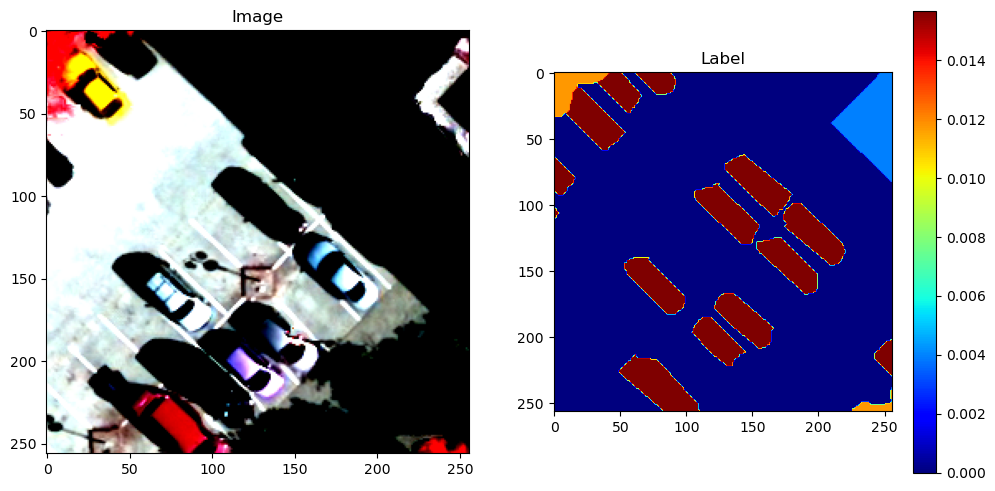

In [30]:
# Convert tensors to numpy arrays
test_3_img_np = np.moveaxis(test_3_img.numpy(), 0, 2)
test_3_l_np = test_3_l.numpy().squeeze()  # Squeeze to remove the single channel dimension

# Plot the images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(test_3_img_np)
ax[0].set_title('Image')
g = ax[1].imshow(test_3_l_np, cmap='jet')
ax[1].set_title('Label')
fig.colorbar(g, ax=ax[1])
plt.show()

In [31]:
#%% Load model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [32]:
# Load model
model3 = torch.load('./Exercise2/Models/unet_resnet18_3channels_25epochs_patchsize256.pt', map_location=torch.device('cpu'))
model4 = torch.load('./Exercise2/Models/unet_resnet18_4channels_25epochs_patchsize256.pt', map_location=torch.device('cpu'))

In [33]:
model3

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [34]:
model4

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [35]:
def pixel_accuracy(output, mask):
    with torch.no_grad():
        # since the output is (batch_size, num of classes, height, width) => need softmax to transform the result output to probabilitis of each class
        # Then use argmax to pick out the class of highest probability => the output now is (batch_size, height, width)
        output = torch.argmax(torch.nn.functional.softmax(output, dim = 1), dim = 1) 
        correct = torch.eq(output, mask).int()
        accuracy = float(correct.sum())/float(correct.numel())
        
    return accuracy

def mIoU(pred_mask, mask, smooth = 1e-10, n_classes = 6):
    with torch.no_grad():
        pred_mask = torch.nn.functional.softmax(pred_mask, dim = 1)
        pred_mask = torch.argmax(pred_mask, dim = 1)
        pred_mask = pred_mask.contiguous().view(-1)
        mask = mask.contiguous().view(-1)
        
        iou_per_class = []
        for cl in range(0, n_classes):
            true_class = (pred_mask == cl)
            true_label = (mask == cl)
            
            if true_label.long().sum().item() == 0:
                iou_per_class.append(np.nan)
            else:
                intersect = torch.logical_and(true_class, true_label).sum().float().item()
                union = torch.logical_or(true_class, true_label).sum().float().item()
                
                iou = (intersect + smooth)/(union + smooth)
                iou_per_class.append(iou)
                
    return np.nanmean(iou_per_class)

In [36]:
def training_model(model, dataloader_dict, criterior, optimizer, scheduler, num_epochs, batch_size):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Device: ', device)
    
    model.to(device) # train network using cuda (gpu)
    torch.backends.cudnn.benchmark = True
    
    num_train_imgs = len(dataloader_dict['train'].dataset)
    num_val_imgs = len(dataloader_dict['val'].dataset)
    batch_size = dataloader_dict['train'].batch_size
    
    iteration = 1
    #batch_multiplier = 2 # After training 2 batches, update parameters
    
    for epoch in range(num_epochs):
        t_epoch_start = time.time()
        t_iter_start = time.time()
        epoch_train_loss = 0
        epoch_val_loss = 0
        train_iou_score = 0
        train_accuracy = 0
        val_iou_score = 0
        val_accuracy = 0
        
        print('Epoch {} / {}'.format(epoch + 1, num_epochs))
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                print('Training phase')
            else:
                if ((epoch + 1) % 5 == 0): # After 5 epochs, validate the model
                    model.eval()
                    print('Validation phase')
                else:
                    continue
            
            count = 0 # count batch_multiplier
            for data, label_data in dataloader_dict[phase]:
                if data.shape[0] == 1:
                    continue # Do not want to train the mini batch of size 1 (only contain 1 images)
                data = data.to(device)
                label_data = label_data.to(device)
                label_data = label_data.to(device).squeeze(1)
                
                optimizer.zero_grad()
                '''
                if (phase == 'train') and (count == 0):
                    optimizer.step() # update parameters
                    optimizer.zero_grad() # set gradients to 0
                    count = batch_multiplier
                 ''' 
                with torch.set_grad_enabled(phase == 'train'):
                    output = model(data)
                    #loss = criterior(output, label_data.long())/batch_multiplier # because after 2 batches, update parameters
                    loss = criterior(output, label_data.long())
                    if phase == 'train':
                        loss.backward() # calculate gradient (backpropagation)
                        optimizer.step()
                        
                        if (iteration % 10 == 0):
                            t_iter_end = time.time()
                            duration = t_iter_end - t_iter_start
                            
                            print('Iteration {} || Loss: {:.6f} || 10 iterations: {:6f} sec'.format(iteration, loss.item()/(batch_size), duration))
                            
                            t_iter_start = time.time() # set time to calculate the time for the next iteration
                        
                        epoch_train_loss += loss.item()*data.size(0)
                        train_iou_score += mIoU(output, label_data, smooth = 1e-10, n_classes = 6)*data.size(0)
                        train_accuracy += pixel_accuracy(output, label_data)*data.size(0)
                        iteration += 1
                    else:
                        epoch_val_loss += loss.item()*data.size(0)
                        val_iou_score += mIoU(output, label_data, smooth = 1e-10, n_classes = 6)*data.size(0)
                        val_accuracy += pixel_accuracy(output, label_data)*data.size(0)
                if phase == 'train':
                    scheduler.step()
            
                    
        t_epoch_end = time.time()
        duration = t_epoch_end - t_epoch_start
        
        print('Epoch {} \nEpoch train loss: {:6f} || Epoch train mIOU: {:.6f} || Epoch train pixel accuracy: {:.6f} \nEpoch val loss: {:.6f} || Epoch val mIOU: {:.6f} || Epoch val pixel accuracy: {:.6f}'.format(epoch + 1, epoch_train_loss/num_train_imgs, train_iou_score/num_train_imgs, train_accuracy/num_train_imgs, epoch_val_loss/num_val_imgs, val_iou_score/num_val_imgs, val_accuracy/num_val_imgs))
        print('Duration: {:.6f} sec\n'.format(duration))
        t_epoch_start = time.time() # reset the starting time for the next epoch

In [37]:
import time
#Training model with 4 input channels
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model4.parameters(), lr = 0.0001)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
start = time.time()
training_model(model4, train_dataloader_4_dict, loss, optimizer, exp_lr_scheduler, num_epochs = 25, batch_size = batch_size)
end = time.time()
print('Total training duration: {:.6f}'.format(end - start))
torch.save(model4.state_dict(), '4_channels_25epochs')

Device:  cpu
Epoch 1 / 25
Training phase
Iteration 10 || Loss: 0.072688 || 10 iterations: 278.824172 sec
Iteration 20 || Loss: 0.073032 || 10 iterations: 211.230883 sec
Epoch 1 
Epoch train loss: 2.470173 || Epoch train mIOU: 0.391277 || Epoch train pixel accuracy: 0.171868 
Epoch val loss: 0.000000 || Epoch val mIOU: 0.000000 || Epoch val pixel accuracy: 0.000000
Duration: 490.469693 sec

Epoch 2 / 25
Training phase
Iteration 30 || Loss: 0.070105 || 10 iterations: 205.642653 sec
Iteration 40 || Loss: 0.071160 || 10 iterations: 239.847450 sec
Epoch 2 
Epoch train loss: 2.255274 || Epoch train mIOU: 0.277112 || Epoch train pixel accuracy: 0.149946 
Epoch val loss: 0.000000 || Epoch val mIOU: 0.000000 || Epoch val pixel accuracy: 0.000000
Duration: 445.908118 sec

Epoch 3 / 25
Training phase
Iteration 50 || Loss: 0.070861 || 10 iterations: 212.099253 sec
Iteration 60 || Loss: 0.069984 || 10 iterations: 207.988170 sec
Epoch 3 
Epoch train loss: 2.254456 || Epoch train mIOU: 0.270661 || Ep

In [61]:
#%% Training model with 3 input channels
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr = 0.0001)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
start = time.time()
training_model(model3, train_dataloader_3_dict, loss, optimizer, exp_lr_scheduler, num_epochs = 25, batch_size = batch_size)
end = time.time()
print('Total training duration: {:.6f}'.format(end - start))
torch.save(model3.state_dict(), '3_channels_25 epochs')

Device:  cpu
Epoch 1 / 25
Training phase
Iteration 10 || Loss: 0.079853 || 10 iterations: 350.354741 sec
Iteration 20 || Loss: 0.076964 || 10 iterations: 247.144737 sec
Epoch 1 
Epoch train loss: 2.707742 || Epoch train mIOU: 0.474313 || Epoch train pixel accuracy: 0.195053 
Epoch val loss: 0.000000 || Epoch val mIOU: 0.000000 || Epoch val pixel accuracy: 0.000000
Duration: 597.875312 sec

Epoch 2 / 25
Training phase
Iteration 30 || Loss: 0.077202 || 10 iterations: 219.190359 sec
Iteration 40 || Loss: 0.078999 || 10 iterations: 213.722061 sec
Epoch 2 
Epoch train loss: 2.468470 || Epoch train mIOU: 0.311648 || Epoch train pixel accuracy: 0.157422 
Epoch val loss: 0.000000 || Epoch val mIOU: 0.000000 || Epoch val pixel accuracy: 0.000000
Duration: 433.237551 sec

Epoch 3 / 25
Training phase
Iteration 50 || Loss: 0.075882 || 10 iterations: 231.371207 sec
Iteration 60 || Loss: 0.078386 || 10 iterations: 201.291414 sec
Epoch 3 
Epoch train loss: 2.466321 || Epoch train mIOU: 0.312767 || Ep

## Testing

In [69]:
data_path = './Exercise2/Data/data'
mspectral_path, label_path, ndsm_path = create_paths(data_path)

In [70]:
mlspec_test_path, ndsm_test_path, label_test_path

(['./Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area11.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area15.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area28.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area30.tif',
  './Exercise2/Data/data\\mspectral-images\\top_mosaic_09cm_area34.tif'],
 ['./Exercise2/Data/data\\ndsm-images\\dsm_09cm_matching_area11_normalized.jpg',
  './Exercise2/Data/data\\ndsm-images\\dsm_09cm_matching_area15_normalized.jpg',
  './Exercise2/Data/data\\ndsm-images\\dsm_09cm_matching_area28_normalized.jpg',
  './Exercise2/Data/data\\ndsm-images\\dsm_09cm_matching_area30_normalized.jpg',
  './Exercise2/Data/data\\ndsm-images\\dsm_09cm_matching_area34_normalized.jpg'],
 ['./Exercise2/Data/data\\labels\\top_mosaic_09cm_area11.tif',
  './Exercise2/Data/data\\labels\\top_mosaic_09cm_area15.tif',
  './Exercise2/Data/data\\labels\\top_mosaic_09cm_area28.tif',
  './Exercise2/Data/data\\labels\\top_m

In [71]:
#Create patches
img_size = 256
mlspec_test_data = create_patches(mlspec_test_path, img_size)
ndsm_test_data = create_patches(ndsm_test_path, img_size)
label_test_data = create_patches(label_test_path, img_size, label = True)

In [72]:
test_dataset_3 = MyDataset(mlspec_test_data, label_test_data, ndsm_test_data, phase = 'test', stack = False) # 3-channel test-dataset
test_dataset_4 = MyDataset(mlspec_test_data, label_test_data, ndsm_test_data, phase = 'test', stack = True) # 4-channel test-dataset

In [73]:
test_dataloader_3 = DataLoader(test_dataset_3, shuffle = False)
test_dataloader_4 = DataLoader(test_dataset_4, shuffle = False)

In [74]:
#Load model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device: ', device)
# 3-channel model
model3 = torch.load('./Exercise2/Models/unet_resnet18_3channels_25epochs_patchsize256.pt', map_location=torch.device('cpu'))
model3.load_state_dict(torch.load('3_channels_25 epochs'))
model3.to(device)
model3.eval()

Device:  cpu


Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [75]:
# 4-channel model
model4 = torch.load('./Exercise2/Models/unet_resnet18_4channels_25epochs_patchsize256.pt', map_location=torch.device('cpu'))
model4.load_state_dict(torch.load('4_channels_25epochs'))
model4.to(device)
model4.eval()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [76]:
test_dataloader_3 = DataLoader(test_dataset_3, shuffle = False)
test_dataloader_4 = DataLoader(test_dataset_4, shuffle = False)

In [77]:
correct_3 = 0
for img, label in test_dataloader_3:
    img = img.to(device)
    label = label.to(device)
    output = model3(img)
    accuracy = pixel_accuracy(output, label)
    correct_3 += accuracy    
print('The test accuracy of 3-channel model is: {:.6f}'.format(correct_3/len(test_dataloader_3.dataset)))

The test accuracy of 3-channel model is: 0.126059


In [78]:
correct_4 = 0
for img, label in test_dataloader_4:
    img = img.to(device)
    label = label.to(device)
    output = model4(img)
    accuracy = pixel_accuracy(output, label)
    correct_4 += accuracy    
    
print('The test accuracy of 4-channel model is: {:.6f}'.format(correct_4/len(test_dataloader_4.dataset)))

The test accuracy of 4-channel model is: 0.119175


In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [82]:
cl = ['Impervious surface', 'Building', 'Low vegetation', 'Tree', 'Car', 'Clutter/background']

def plot_cm_multiclass(pred, true, cm):
    idx_pred = np.unique(pred)
    idx_true = np.unique(true)
    idx = np.union1d(idx_pred, idx_true)
    class_used = [cl[int(i)] for i in idx]
    
    # Plot confusion matrix in a beautiful manner|
    fig = plt.figure(figsize=(16, 14))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted Image Class', fontsize=20)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=0, fontsize = 12)
    ax.xaxis.set_ticklabels(class_used, fontsize = 10)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True Image Class', fontsize=20)
    ax.yaxis.set_ticklabels(class_used, fontsize = 10)
    plt.yticks(rotation=0, fontsize = 12)

    plt.title('Confusion Matrix', fontsize=20)

    plt.show()

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# # Set the model to evaluation mode
# model.eval()

# List to store results
results = []

# Disable gradient calculations
with torch.no_grad():
    # Initialize variables for predictions and true labels
    predicted_labels = []
    true_labels = [] 
    for images, labels, file_paths in test_dataloader_norm:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Calculate predicted labels
        _, predicted = torch.max(outputs.data, 1)
        
        # Update predicted labels and true labels
        predicted_labels.extend(predicted.cpu().tolist())
        true_labels.extend(labels.cpu().tolist())
        
        # Store the results for each image in the batch
        for i in range(images.size(0)):
            filename = os.path.basename(file_paths[i])
            true_label = classes[labels[i].item()]
            predicted_label = classes[predicted[i].item()]
            results.append({
                'file_path': file_paths[i].replace('\\', '/'),  # # Normalize path separators
                'true_class': true_label,
                'predicted_class': predicted_label
            })

# Calculate precision, recall, F1-score, and overall accuracy
classification_rep = classification_report(true_labels, predicted_labels, target_names=classes)
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Display the classification report and confusion matrix
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)

# Create a DataFrame and save to CSV
df = pd.DataFrame(results)
df.to_csv('Predictions/predictions_mit_cnn.csv', index=False)

# Optionally, display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=classes)
disp.plot()
plt.xlabel("Predicted Image Class")
plt.ylabel("True Image Class")
plt.title("Confusion Matrix for Car Image Classification: CNN")
plt.savefig('Results/ConfusionMatrixCNN.pdf')
plt.show()

In [101]:
cl = ['Impervious surface', 'Building', 'Low vegetation', 'Tree', 'Car', 'Clutter/background']

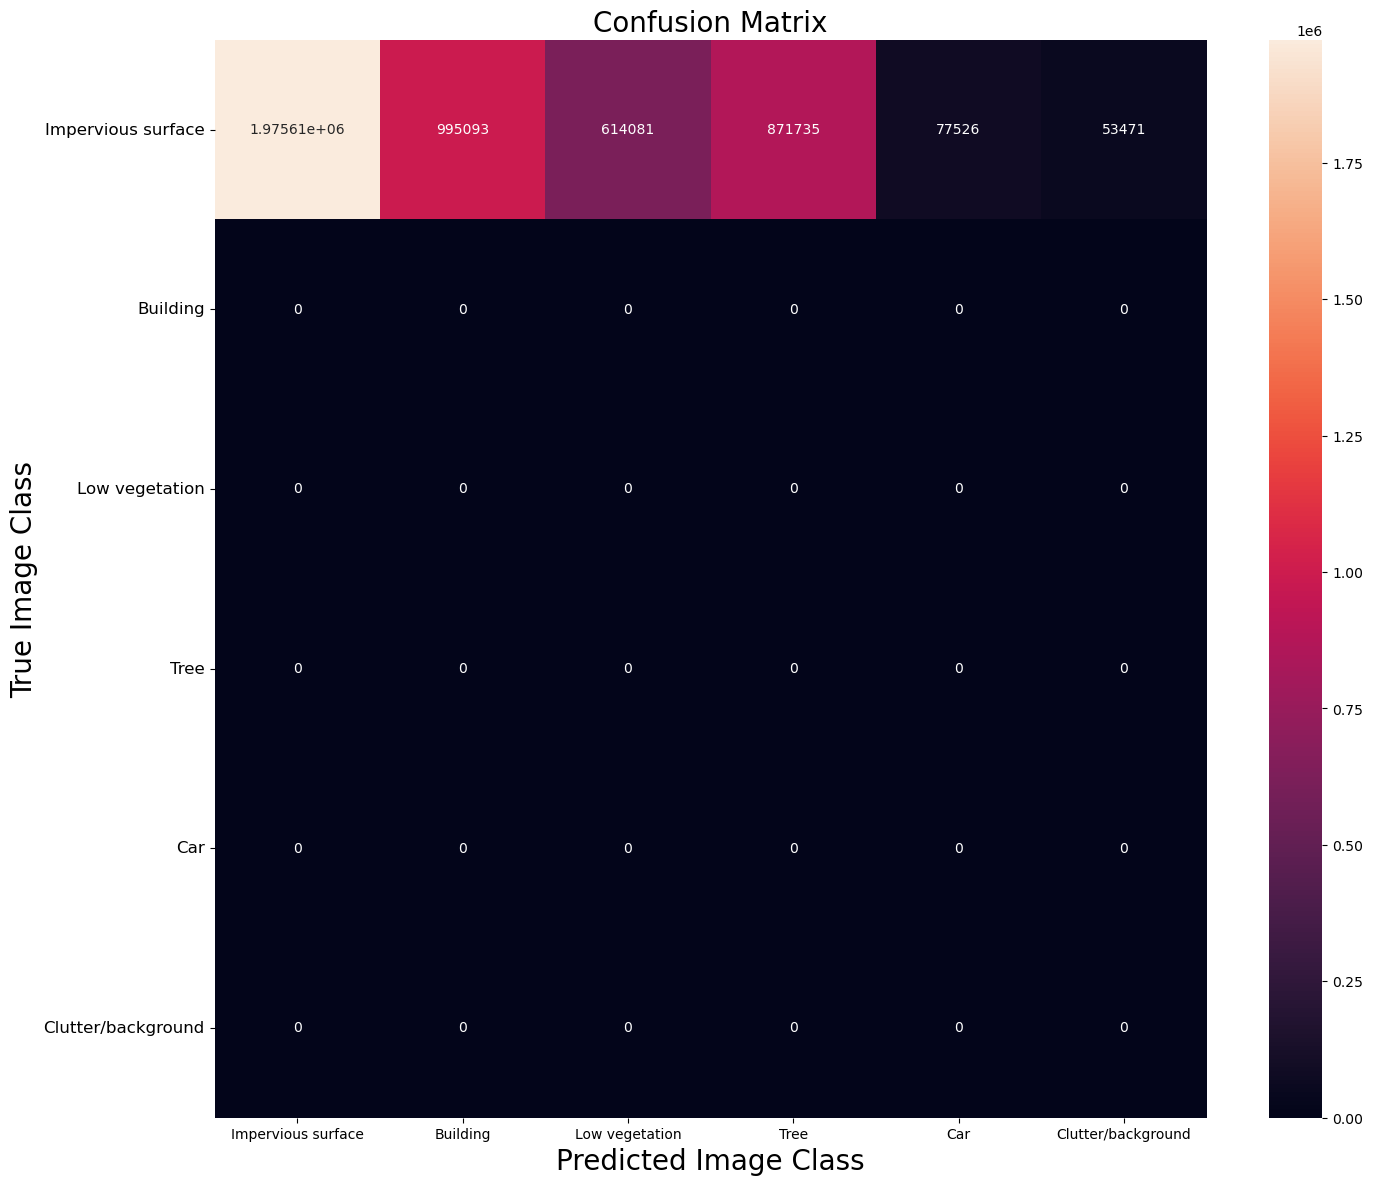

C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


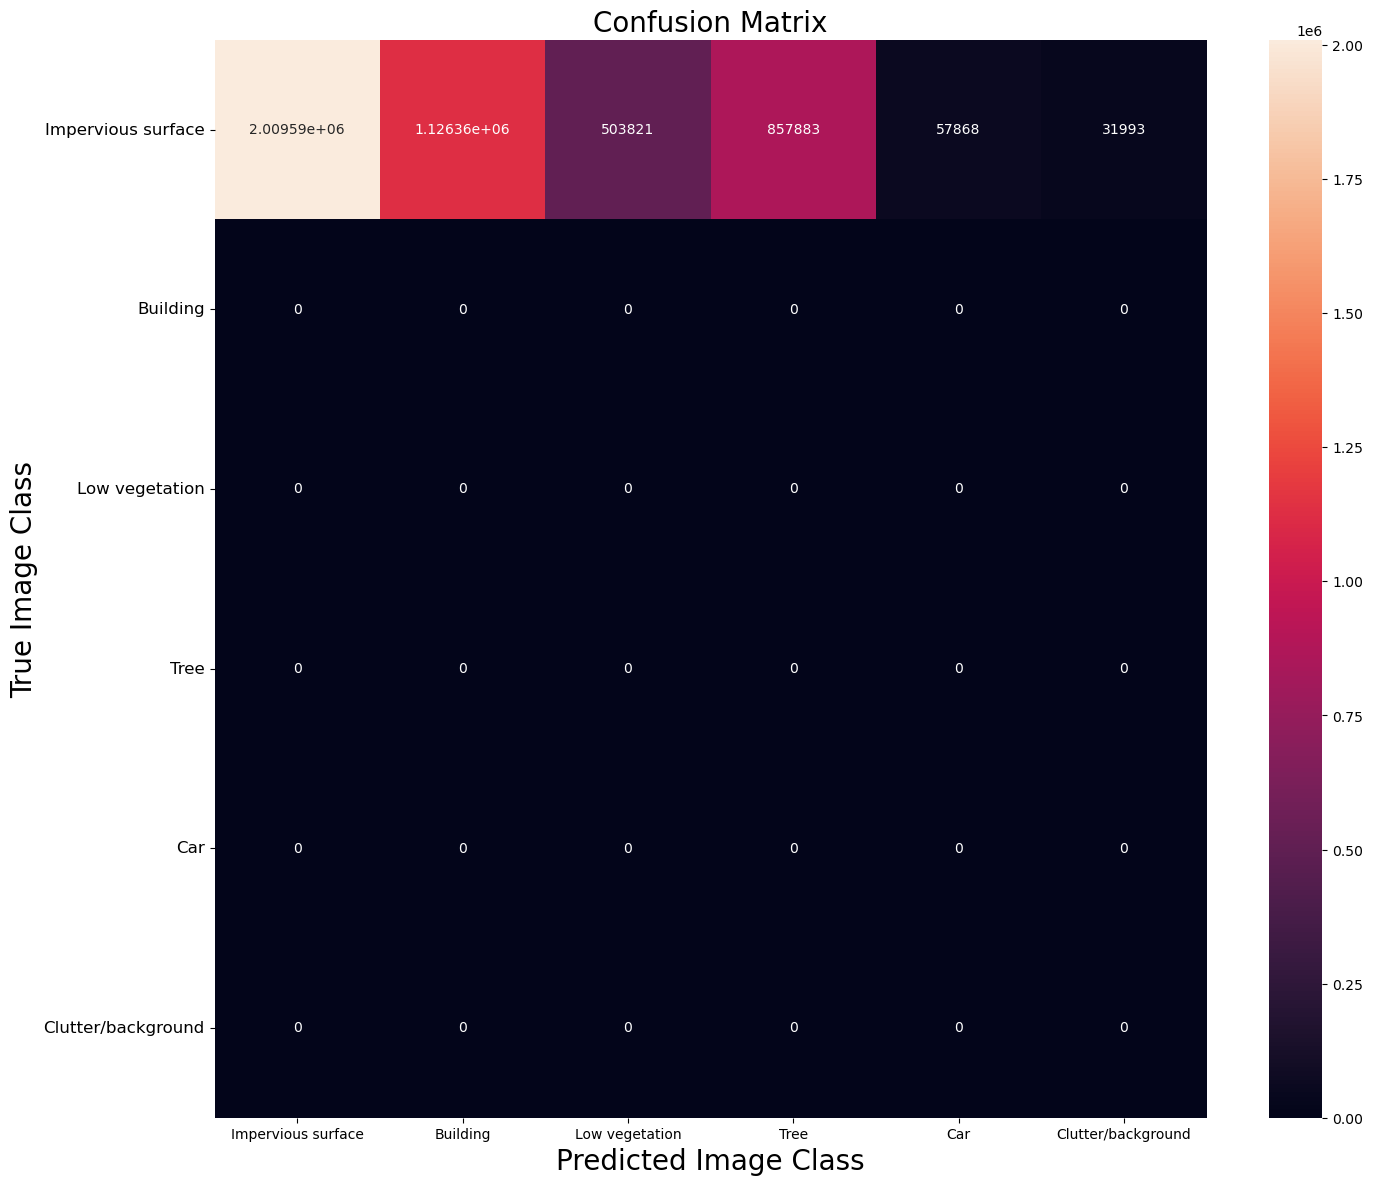

C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


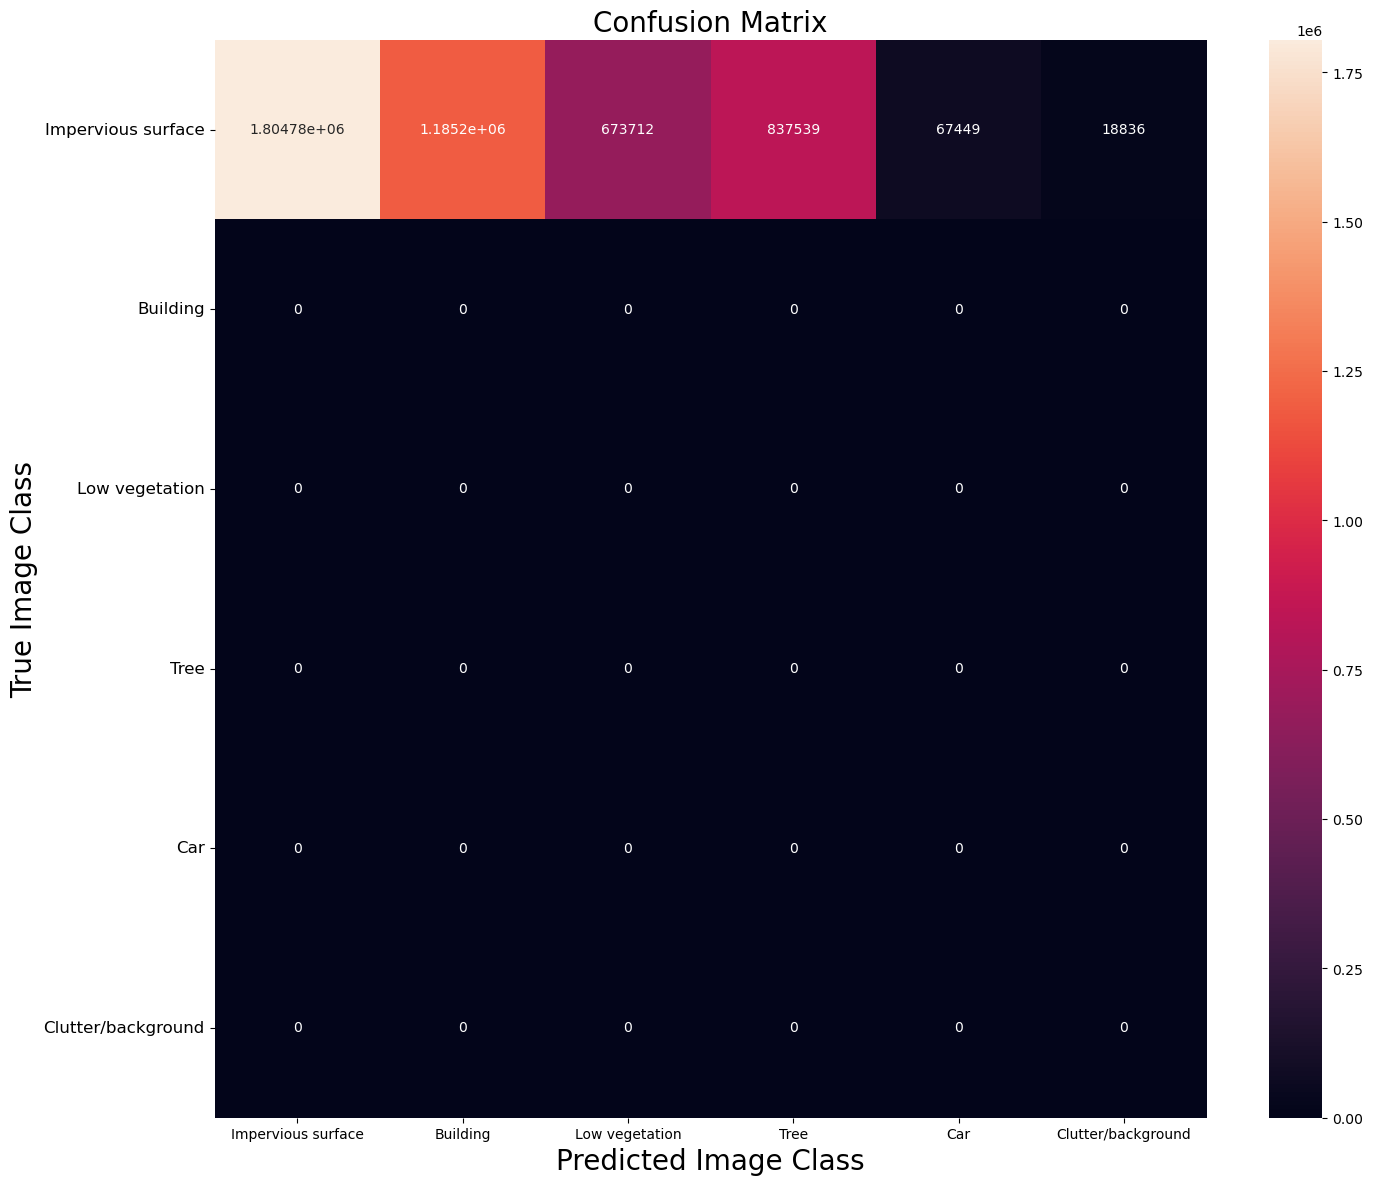

C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


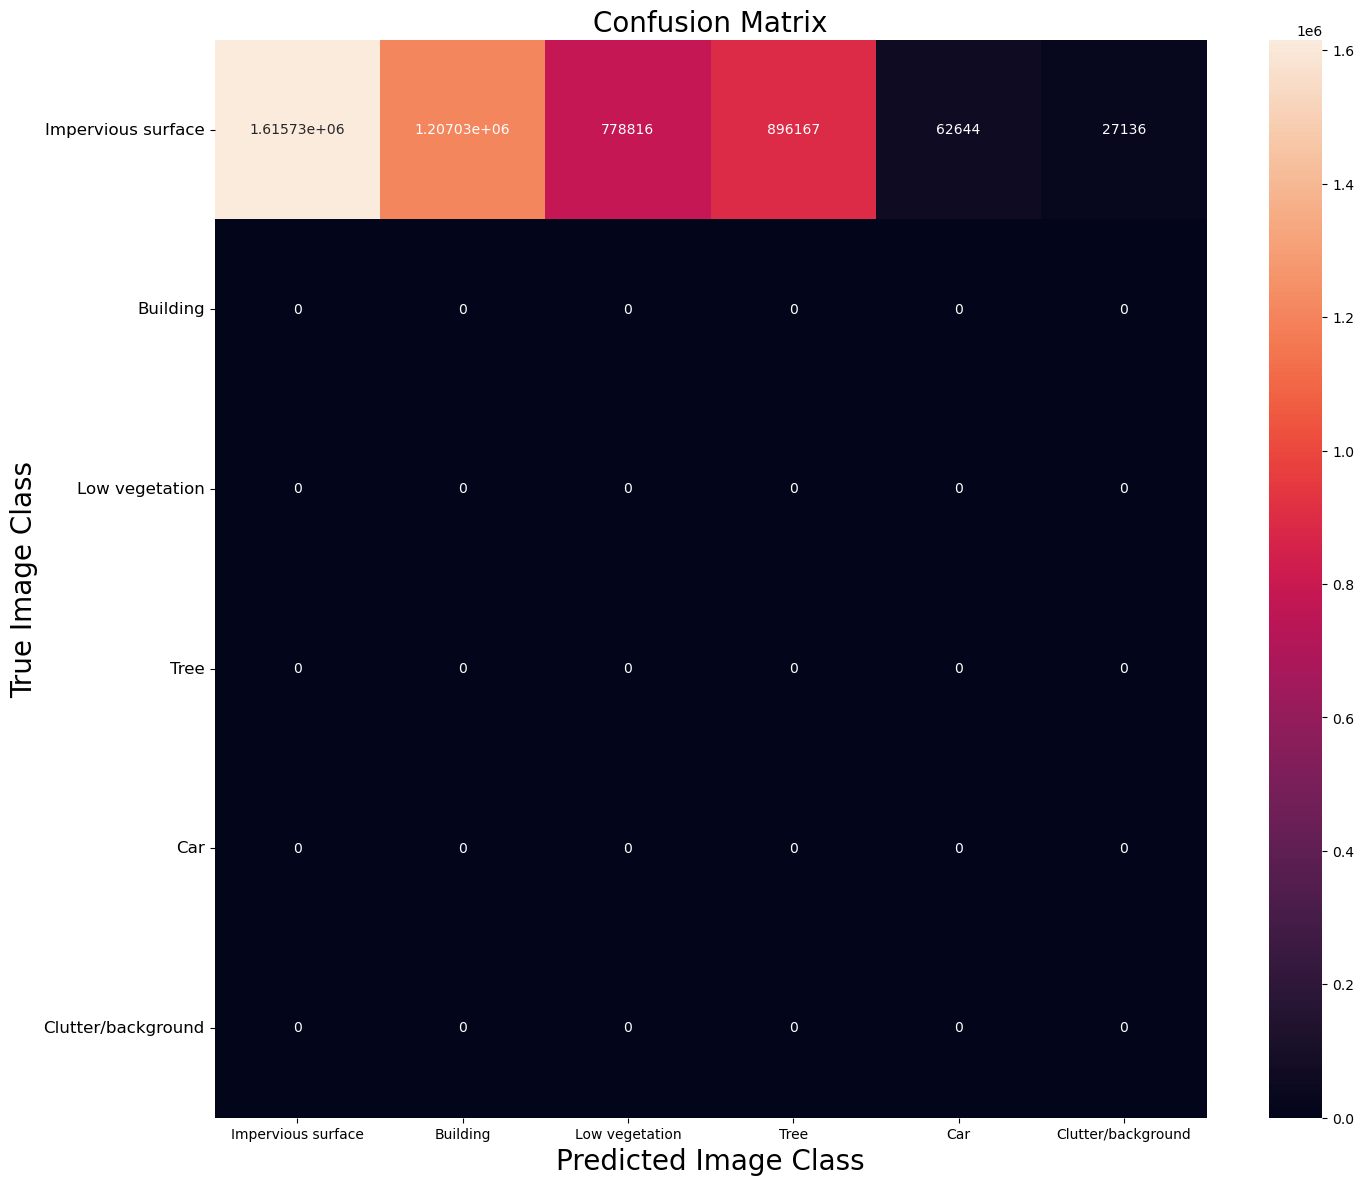

C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


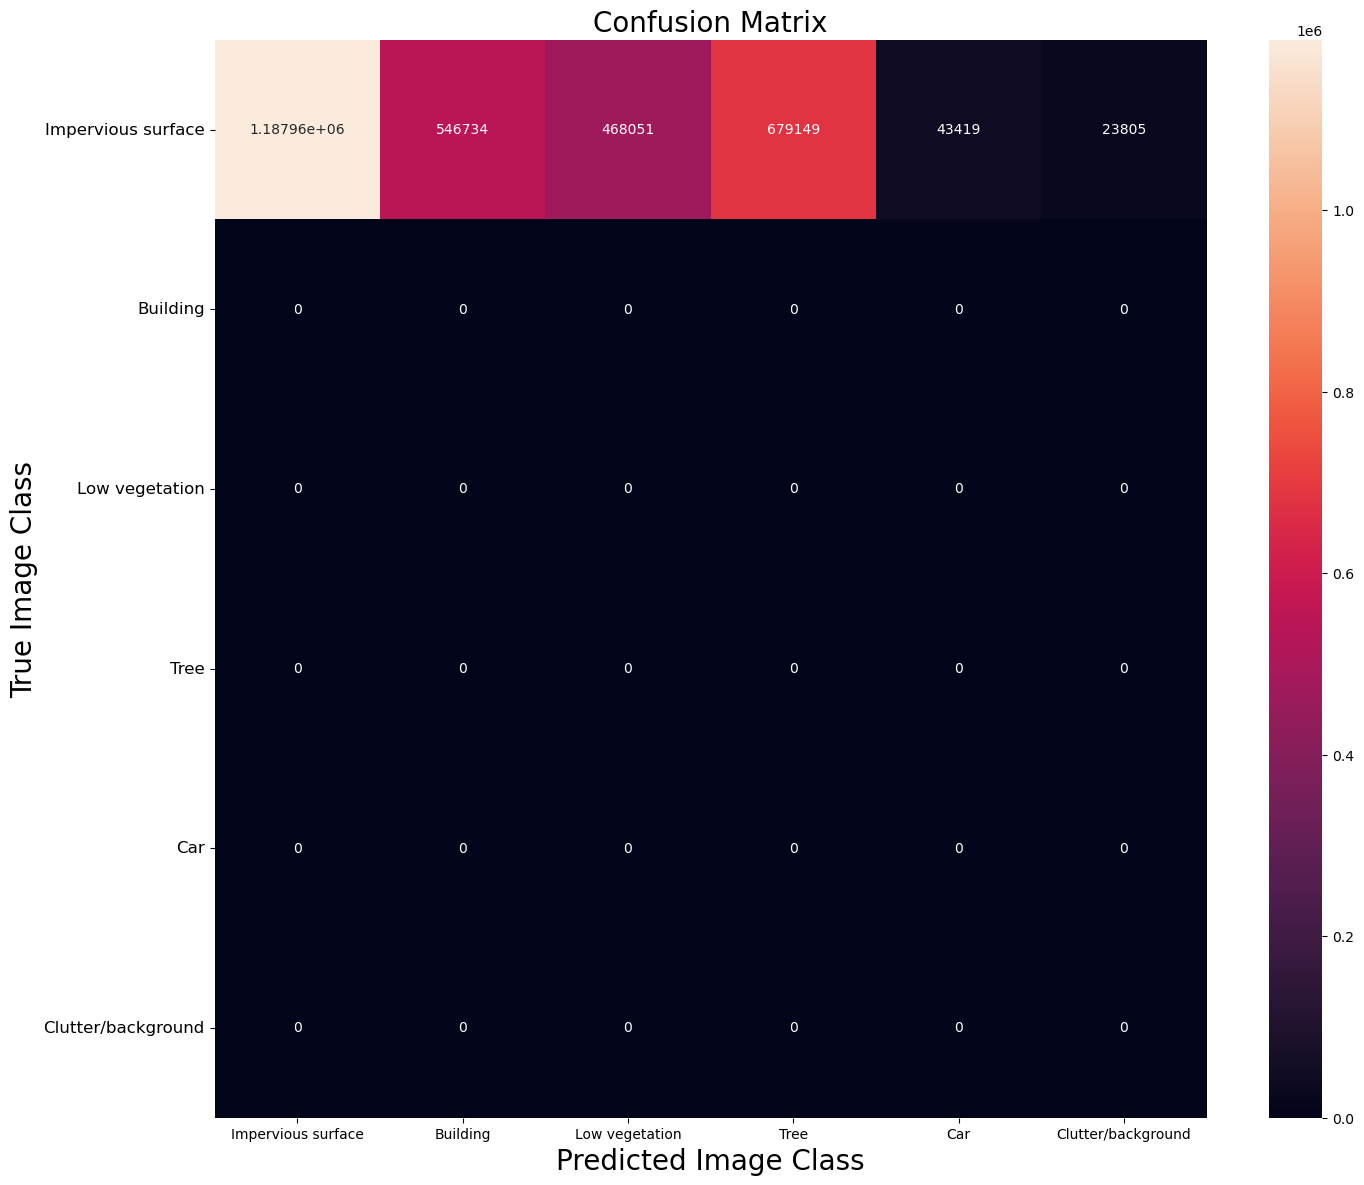

C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sudur\miniconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [102]:
import os
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Compute confusion matrix for each test images
for i in range(0, 5):
    mlspec_test_data = create_patches([mlspec_test_path[i]], img_size)
    ndsm_test_data = create_patches([ndsm_test_path[i]], img_size)
    label_test_data = create_patches([label_test_path[i]], img_size, label = True)
    
    test_dataset_3 = MyDataset(mlspec_test_data, label_test_data, ndsm_test_data, phase = 'test', stack = False) # 3-channel dataset
    test_dataset_4 = MyDataset(mlspec_test_data, label_test_data, ndsm_test_data, phase = 'test', stack = True) # 4-channel dataset

    test_dataloader_3 = DataLoader(test_dataset_3, shuffle = False)
    test_dataloader_4 = DataLoader(test_dataset_4, shuffle = False)

    pred_list = []
    true_list = []
    for img, label in test_dataloader_3:
        img = img.to(device)
        label = label.to(device)
        output = model3(img)
        output = torch.argmax(torch.nn.functional.softmax(output, dim = 1), dim = 1) 
        output = output.detach().cpu().numpy().squeeze()
        label = label.detach().cpu().numpy().squeeze()
        pred = np.ravel(output)
        true = np.ravel(label)
        
        pred_list = np.concatenate((pred_list, pred))
        true_list = np.concatenate((true_list, true))
        
        # Ensure integer type
        true_list = true_list.astype(np.int64)
        pred_list = pred_list.astype(np.int64)
        
    cm = confusion_matrix(true_list, pred_list)
    plot_cm_multiclass(pred_list, true_list, cm)
    classification_rep = classification_report(true_list, pred_list, target_names=cl)
    classification_rep

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


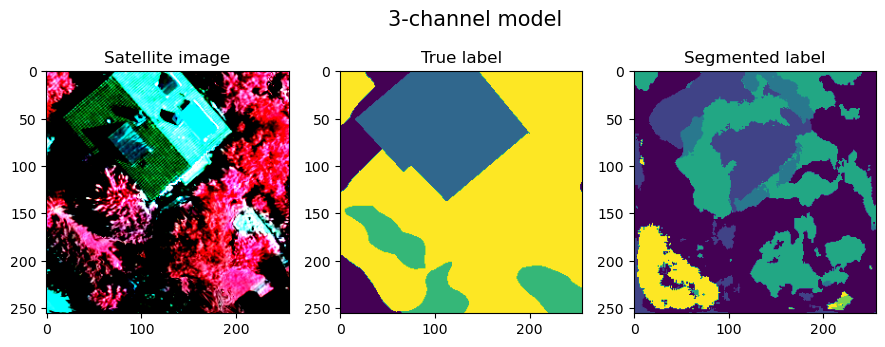

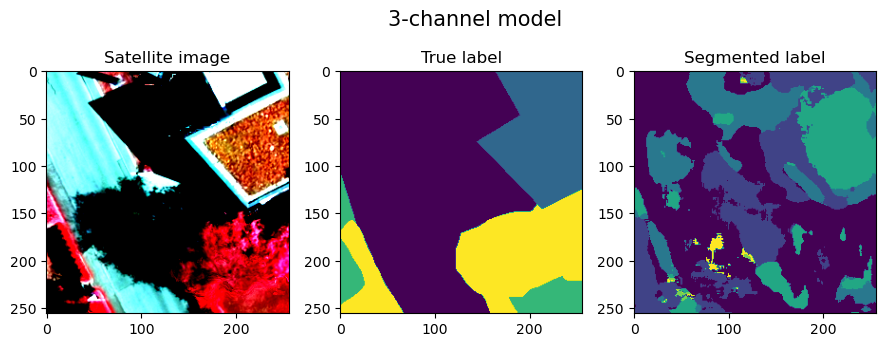

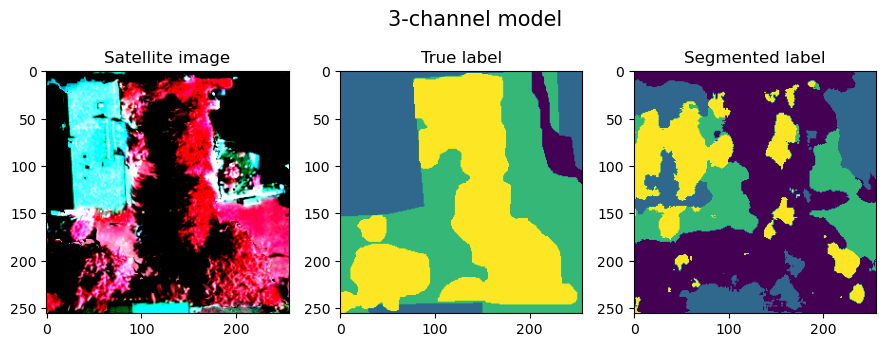

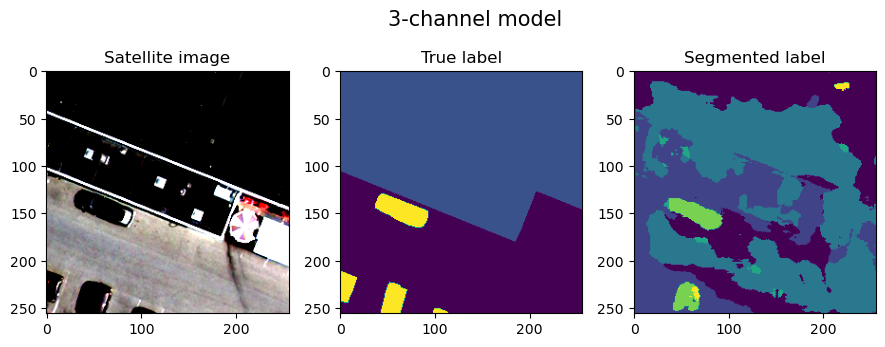

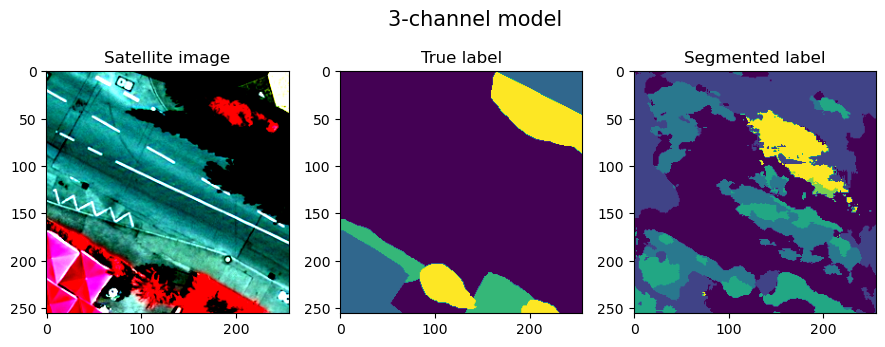

In [99]:
for i in range(0, 5):
    mlspec_test_data = create_patches([mlspec_test_path[i]], img_size)
    ndsm_test_data = create_patches([ndsm_test_path[i]], img_size)
    label_test_data = create_patches([label_test_path[i]], img_size, label = True)
    
    test_dataset_3 = MyDataset(mlspec_test_data, label_test_data, ndsm_test_data, phase = 'test', stack = False) # 3-channel dataset
    # test_dataset_4 = MyDataset(mlspec_test_data, label_test_data, ndsm_test_data, phase = 'test', stack = True) # 4-channel dataset

    test_dataloader_3 = DataLoader(test_dataset_3, shuffle = False)
    # test_dataloader_4 = DataLoader(test_dataset_4, shuffle = False)

    # pred_list = []
    # true_list = []
    for img, label in test_dataloader_3:
        i = img.to(device)
        output = model3(i)
        output = torch.argmax(torch.nn.functional.softmax(output, dim = 1), dim = 1)
        output = output.detach().cpu().numpy().squeeze()
        t = img[:,0:3,:,:]
        fig, ax = plt.subplots(1, 3)
        ax[0].set_title('Satellite image')
        ax[0].imshow(np.moveaxis(t.numpy().squeeze(), 0, 2))
        ax[1].set_title('True label')
        ax[1].imshow(label.numpy().squeeze())
        ax[2].set_title('Segmented label')
        ax[2].imshow(output)
        plt.tight_layout(rect=[0, 0, 1.4, 1.2])
        fig.suptitle('3-channel model', fontsize = 15, x=0.75)
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


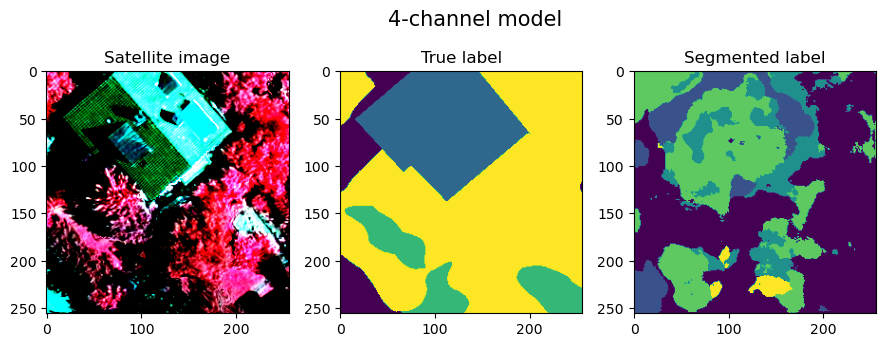

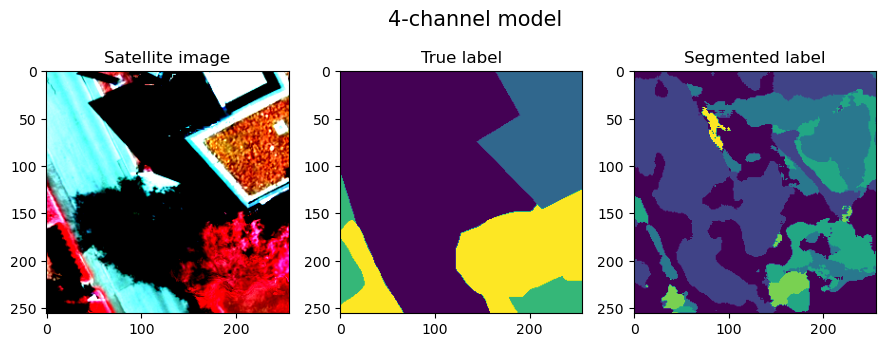

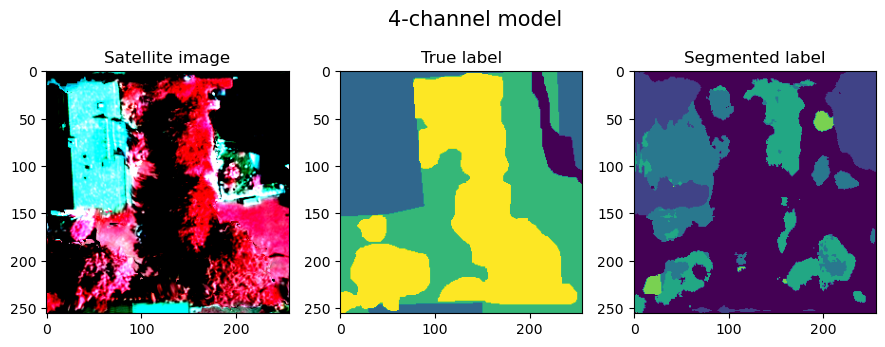

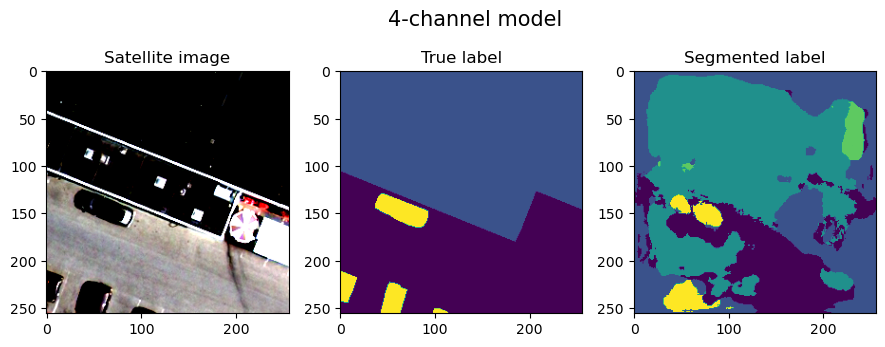

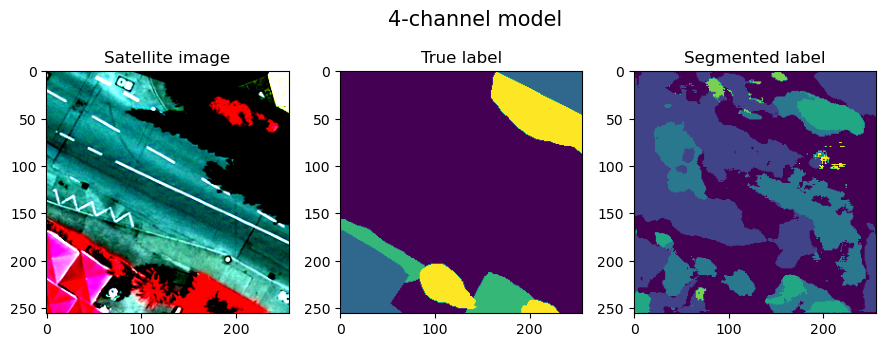

In [100]:
for i in range(0, 5):
    mlspec_test_data = create_patches([mlspec_test_path[i]], img_size)
    ndsm_test_data = create_patches([ndsm_test_path[i]], img_size)
    label_test_data = create_patches([label_test_path[i]], img_size, label = True)
    
    # test_dataset_3 = MyDataset(mlspec_test_data, label_test_data, ndsm_test_data, phase = 'test', stack = False) # 3-channel dataset
    test_dataset_4 = MyDataset(mlspec_test_data, label_test_data, ndsm_test_data, phase = 'test', stack = True) # 4-channel dataset

    # test_dataloader_3 = DataLoader(test_dataset_3, shuffle = False)
    test_dataloader_4 = DataLoader(test_dataset_4, shuffle = False)

    # pred_list = []
    # true_list = []
    for img, label in test_dataloader_4:
        i = img.to(device)
        output = model4(i)
        output = torch.argmax(torch.nn.functional.softmax(output, dim = 1), dim = 1)
        output = output.detach().cpu().numpy().squeeze()
        t = img[:,0:3,:,:]
        fig, ax = plt.subplots(1, 3)
        ax[0].set_title('Satellite image')
        ax[0].imshow(np.moveaxis(t.numpy().squeeze(), 0, 2))
        ax[1].set_title('True label')
        ax[1].imshow(label.numpy().squeeze())
        ax[2].set_title('Segmented label')
        ax[2].imshow(output)
        plt.tight_layout(rect=[0, 0, 1.4, 1.2])
        fig.suptitle('4-channel model', fontsize = 15, x=0.75)
        break